In [4]:
# Importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
sns.set_theme()

import EarlyStopping as es

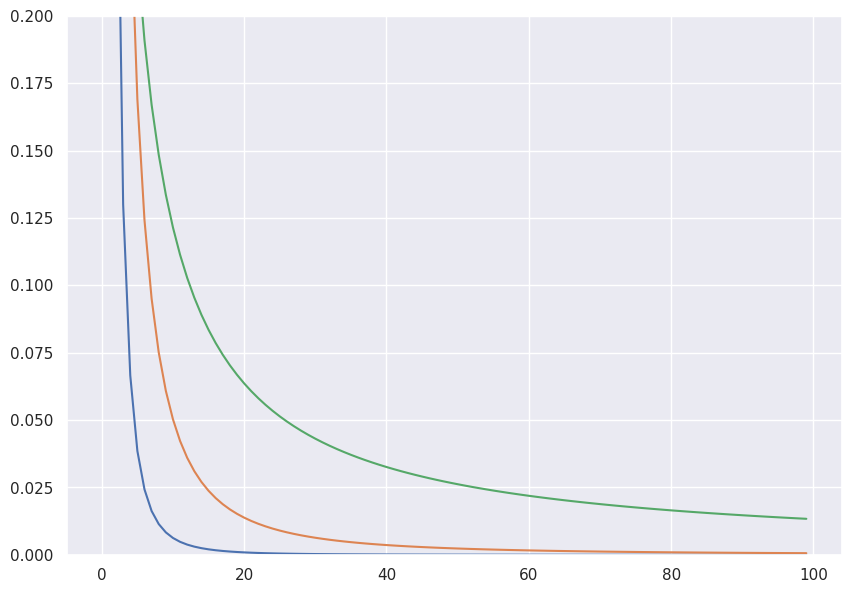

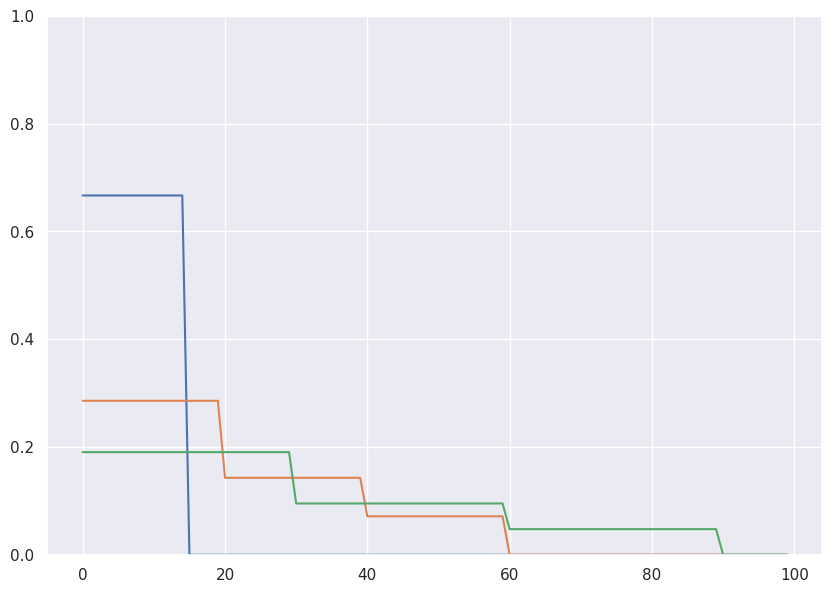

In [5]:
# Signals from the L2-boosting paper

# Metaparameters
sample_size = 1000
para_size   = 1000

# Gamma-sparse signals
beta_3   = 1 / (1 + np.arange(para_size))**3
beta_3   = 10 * beta_3 / np.sum(np.abs(beta_3))

beta_2   = 1 / (1 + np.arange(para_size))**2  
beta_2   = 10 * beta_2 / np.sum(np.abs(beta_2))

beta_1   = 1 / (1 + np.arange(para_size))
beta_1   = 10 * beta_1 / np.sum(np.abs(beta_1))

# S-sparse signals
beta_15        = np.zeros(para_size)  
beta_15[0:15]  = 1
beta_15        = 10 * beta_15 / np.sum(np.abs(beta_15))

beta_60        = np.zeros(para_size)  
beta_60[0:20]  = 1
beta_60[20:40] = 0.5
beta_60[40:60] = 0.25
beta_60        = 10 * beta_60 / np.sum(np.abs(beta_60))

beta_90        = np.zeros(para_size)  
beta_90[0:30]  = 1
beta_90[30:60] = 0.5
beta_90[60:90] = 0.25
beta_90        = 10 * beta_90 / np.sum(np.abs(beta_90))

fig = plt.figure(figsize = (10,7))
plt.ylim(0, 0.2)
plt.plot(beta_3[0:100])
plt.plot(beta_2[0:100])
plt.plot(beta_1[0:100])

fig = plt.figure(figsize = (10,7))
plt.ylim(0, 1)
plt.plot(beta_15[0:100])
plt.plot(beta_60[0:100])
plt.plot(beta_90[0:100])

In [22]:
# Simulating data
cov   = np.identity(para_size)
sigma = np.sqrt(1)
X     = np.random.multivariate_normal(np.zeros(para_size), cov, sample_size)
f     = X @ beta_90
eps   = np.random.normal(0, sigma, sample_size)
Y     = f + eps

alg = es.L2_boost(X, Y, f)
noise_estimate = alg.get_noise_estimate(K = 0.5)
alg.discrepancy_stop(crit = noise_estimate, max_iter = 200)
alg.iter

44

In [20]:
1 / 0.6**2

2.7777777777777777

In [14]:
alg.iter

23

In [4]:
alg.boost(200)
alg.iter
alg.get_noise_estimate()
alg.get_aic_iteration(K = 2)

Lambda_0 = np.sqrt(1 * np.log(para_size) / sample_size)**1 
lasso = linear_model.Lasso(alpha = Lambda_0, fit_intercept = False)
lasso.fit(X, Y)
noiseEstimate = np.mean((Y - lasso.predict(X))**2) 
noiseEstimate

maxIter = 10
for iteration in range(maxIter):
    Lambda = np.sqrt(noiseEstimate) * Lambda_0
    lasso = linear_model.Lasso(alpha = Lambda, fit_intercept = False)
    lasso.fit(X, Y)
    noiseEstimate = np.mean((Y - lasso.predict(X))**2) 
    noiseEstimate
    print(noiseEstimate)
lassoMse = np.mean((f - lasso.predict(X))**2) 
noiseEstimate
noiseLevel

1.4835117482065407
1.5255074612014305
1.538804535077009
1.543014777426455
1.5443478632422307
1.5447699571842493
1.544903604466153
1.5449459211027594
1.5449593197870282
1.5449635622021758


NameError: name 'noiseLevel' is not defined

(0.0, 30.0)

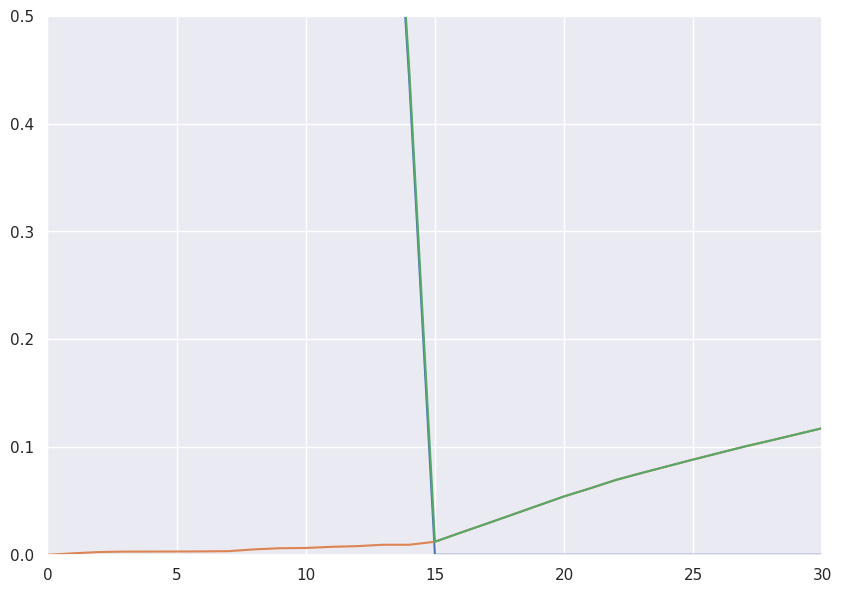

In [19]:
# Full L2-boosting path with bias-variance decomposition
alg = es.L2_boost(X, Y, f)
alg.boost(200)

fig = plt.figure(figsize = (10, 7))
plt.plot(alg.bias2)
plt.plot(alg.stoch_error)
plt.plot(alg.mse)
plt.ylim((0, 0.5))
plt.xlim((0, 30))

In [28]:
# L2-boosting until the balanced oracle is reached
alg = es.L2_boost(X, Y, f)
alg.boost_to_balanced_oracle()
bal_oracle = alg.iter
bal_oracle

70

In [9]:
# L2-boosting with early stopping according to the true empirical noise level
emp_noise_level = np.mean(eps**2)
alg = es.L2_boost(X, Y, f)
alg.boost_to_early_stop(crit = emp_noise_level, max_iter = sample_size)
early_stopping_time = alg.iter
early_stopping_time

49

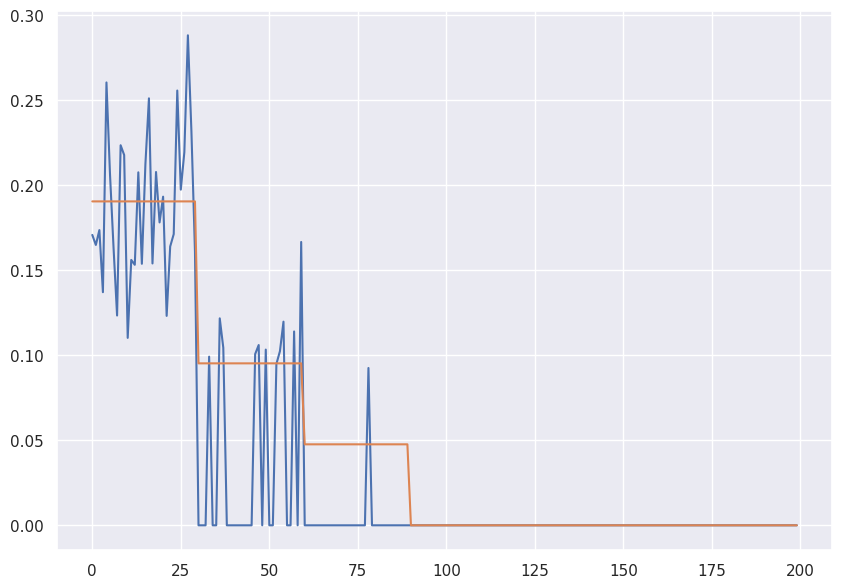

In [11]:
# Estimated signal vs. true signal
fig = plt.figure(figsize = (10,7))
plt.plot(alg.coefficients[0:200])
plt.plot(beta_90[0:200])

In [ ]:
Lambda_0 = np.sqrt(1 * np.log(paraSize) / sampleSize)**1 
lasso = linear_model.Lasso(alpha = Lambda_0, fit_intercept = False)
lasso.fit(X, Y)
noiseEstimate = np.mean((Y - lasso.predict(X))**2) 
noiseEstimate

maxIter = 10
for iteration in range(maxIter):
    Lambda = np.sqrt(noiseEstimate) * Lambda_0
    lasso = linear_model.Lasso(alpha = Lambda, fit_intercept = False)
    lasso.fit(X, Y)
    noiseEstimate = np.mean((Y - lasso.predict(X))**2) 
    noiseEstimate
    print(noiseEstimate)
lassoMse = np.mean((f - lasso.predict(X))**2) 
noiseEstimate
noiseLevel


In [50]:
alg = es.L2_boost(X, Y, f)
alg.boost()
alg.iter
alg.get_noise_estimate()

AttributeError: 'L2_boost' object has no attribute 'get_noise_estimate'